## Importing Data

In [96]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0050_basicfeatures.csv')
df2 = pd.read_csv('../../data/processed/yp_competitors_rws_0001_0050_textfeatures.csv')
df = df1.merge(df2, on=['alias', 'ratingValue', 'dataPublished', 'description', 'author'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19019
Data columns (total 25 columns):
alias               19020 non-null object
ratingValue         19020 non-null int64
dataPublished       19020 non-null object
description         19020 non-null object
author              19020 non-null object
sentiment           19020 non-null int64
word_count          19020 non-null int64
sent_count          19020 non-null int64
chr_count           19020 non-null int64
avg_word_len        19020 non-null float64
avg_sent_len        19020 non-null float64
num_of_stopwords    19020 non-null int64
num_of_modals       19020 non-null int64
hashtags            19020 non-null int64
mentions            19020 non-null int64
numerics            19020 non-null int64
uppercase_cnt       19020 non-null int64
punctuation_cnt     19020 non-null int64
vocab_cnt           19020 non-null int64
ratio_lexical       19020 non-null float64
ratio_content       19020 non-null float64
sent_tokens       

In [97]:
# import fixes
from itertools import chain
import ast
# csv list fix with : ast
df.sent_tokens = df.sent_tokens.apply(lambda x: ast.literal_eval(x))
df.word_tokens = df.word_tokens.apply(lambda x: ast.literal_eval(x))
df.word_tokens_doc = df.word_tokens_doc.apply(lambda x: ast.literal_eval(x))
df.norm_tokens = df.norm_tokens.apply(lambda x: ast.literal_eval(x))

In [98]:
df.loc[:, ['sent_tokens', 'word_tokens_doc', 'word_tokens', 'norm_tokens']].head()

,sent_tokens,word_tokens_doc,word_tokens,norm_tokens
0,[I stumbled across this great restaurant overl...,"[[I, stumbled, across, this, great, restaurant...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce..."
1,"[Excellent view on the ocean at sunset., Excel...","[[Excellent, view, on, the, ocean, at, sunset,...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, ., excel, food, ...."
2,[This place was not what the reviews portrayed...,"[[This, place, was, not, what, the, reviews, p...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, ., starter, ,, walk, ..."
3,[We were excited to repeat our Keoki's (in Kau...,"[[We, were, excited, to, repeat, our, Keoki, '...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, (, kauai, ), lovefe..."
4,"[If you're looking for a tourist spot, this is...","[[If, you, 're, looking, for, a, tourist, spot...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, ,, ., unfortun, cou..."


In [99]:
df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,numerics,uppercase_cnt,punctuation_cnt,vocab_cnt,ratio_lexical,ratio_content,sent_tokens,word_tokens_doc,word_tokens,norm_tokens
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,0,10,17,76,0.637037,0.674074,[I stumbled across this great restaurant overl...,"[[I, stumbled, across, this, great, restaurant...","[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce..."
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0,0,6,25,0.777778,0.638889,"[Excellent view on the ocean at sunset., Excel...","[[Excellent, view, on, the, ocean, at, sunset,...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, ., excel, food, ...."
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,2,5,31,130,0.534545,0.567273,[This place was not what the reviews portrayed...,"[[This, place, was, not, what, the, reviews, p...","[This, place, was, not, what, the, reviews, po...","[place, review, portray, ., starter, ,, walk, ..."
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,2,7,43,206,0.484211,0.604211,[We were excited to repeat our Keoki's (in Kau...,"[[We, were, excited, to, repeat, our, Keoki, '...","[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, (, kauai, ), lovefe..."
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,2,1,21,97,0.648810,0.636905,"[If you're looking for a tourist spot, this is...","[[If, you, 're, looking, for, a, tourist, spot...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, ,, ., unfortun, cou..."


## Models

### Topic Modeling

#### Document is Reviews

In [189]:
data.head()

0    [I, stumbled, across, this, great, restaurant,...
1    [I, did, not, have, high, expectations, for, t...
2    [The, fish, and, chips, is, some, of, the, bes...
3                        [I, highly, recommend, it, .]
4    [Also, ,, the, turkey, bacon, sandwich, was, S...
dtype: object

In [112]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

data = df.norm_tokens[:100]

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [8]:
# lda test
perplexity = lda_model.log_perplexity(doc_term_matrix)
coherence = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v').get_coherence()
print(perplexity, ',', coherence)

-6.501593590273759 , 0.27550108296606646


In [9]:
# optimal topic numbers
coherence_values = []
model_list = []
for num_topics in range(2, 40, 4):
    model = Lda(
        corpus=doc_term_matrix,
        id2word=id2word,
        num_topics=num_topics, 
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

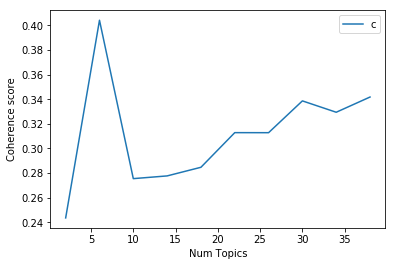

In [11]:
# to select number of topics
import matplotlib.pyplot as plt
x = range(2, 40, 4)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
mallet_path = '../../model/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=20, id2word=id2word)

In [82]:
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)
pd.concat([df.iloc[:100,:], pd.DataFrame(a)], axis=1)

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,uppercase_cnt,punctuation_cnt,vocab_cnt,ratio_lexical,ratio_content,sent_tokens,word_tokens,norm_tokens,0,1
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,10,17,76,0.637037,0.674074,[I stumbled across this great restaurant overl...,"[I, stumbled, across, this, great, restaurant,...","[stumbl, across, great, restaur, overlook, oce...",2,0.995480
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0,6,25,0.777778,0.638889,"[Excellent view on the ocean at sunset., Excel...","[Excellent, view, on, the, ocean, at, sunset, ...","[excel, view, ocean, sunset, ., excel, food, ....",1,0.537855
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,5,31,130,0.534545,0.567273,[This place was not what the reviews portrayed...,"[This, place, was, not, what, the, reviews, po...","[place, review, portray, ., starter, ,, walk, ...",2,0.997543
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.,0,475,34,2226,3.783158,...,7,43,206,0.484211,0.604211,[We were excited to repeat our Keoki's (in Kau...,"[We, were, excited, to, repeat, our, Keoki, 's...","[excit, repeat, keoki, 's, (, kauai, ), lovefe...",1,0.750638
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.,0,168,10,776,3.732143,...,1,21,97,0.648810,0.636905,"[If you're looking for a tourist spot, this is...","[If, you, 're, looking, for, a, tourist, spot,...","['re, look, tourist, spot, ,, ., unfortun, cou...",5,0.996100
5,kimos-maui-lahaina,4,2019-01-10,"What an amazing restaurant, especially the vie...",Nihad V.,1,108,6,496,3.694444,...,0,13,68,0.722222,0.583333,"[What an amazing restaurant, especially the vi...","[What, an, amazing, restaurant, ,, especially,...","[amaz, restaur, ,, especi, view, dinner, ., di...",8,0.993142
6,kimos-maui-lahaina,5,2018-11-25,Came back again with my boyfriend this time to...,Hannah V.,1,92,6,424,3.728261,...,2,9,61,0.739130,0.597826,[Came back again with my boyfriend this time t...,"[Came, back, again, with, my, boyfriend, this,...","[came, back, boyfriend, time, show, beauti, vi...",9,0.992599
7,kimos-maui-lahaina,2,2018-11-17,We were walking through downtown Lahaina and w...,David N.,0,243,14,1224,4.172840,...,7,24,129,0.600823,0.650206,[We were walking through downtown Lahaina and ...,"[We, were, walking, through, downtown, Lahaina...","[walk, downtown, lahaina, want, someth, eat, ,...",8,0.997235
8,kimos-maui-lahaina,3,2018-11-05,I ended up here on Halloween night due to the ...,Kaikilani A.,0,150,8,737,4.040000,...,2,13,96,0.700000,0.580000,[I ended up here on Halloween night due to the...,"[I, ended, up, here, on, Halloween, night, due...","[end, halloween, night, due, unfortun, event, ...",1,0.995316
9,kimos-maui-lahaina,5,2018-11-09,"Really great service, really fresh apps, and a...",Jesse W.,1,167,10,784,3.844311,...,3,23,81,0.574850,0.670659,"[Really great service, really fresh apps, and ...","[Really, great, service, ,, really, fresh, app...","[realli, great, servic, ,, realli, fresh, app,...",9,0.996356


#### Document is Sentences

In [278]:
data = pd.Series(list(chain(*df.word_tokens_doc[:100])), name='word_tokens_doc')

id2word = Dictionary(documents=data)
doc_term_matrix = [id2word.doc2bow(doc) for doc in data]
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(
    corpus=doc_term_matrix,
    id2word=id2word,
    num_topics=10, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [279]:
len(lda_model.get_document_topics(doc_term_matrix))

971

In [280]:
# score topic and probabilities to each document (sentence in this case)
a = []; b = []
for doc_topic_list in lda_model.get_document_topics(doc_term_matrix):
    dtp = max(doc_topic_list, key=lambda x: x[1])
    a.append(dtp)
    doc_topic_list.remove(dtp)
    b.append(doc_topic_list)

pd_sent_topic = pd.concat([data, pd.DataFrame(a, columns=['topic', 'prob'])], axis=1)
pd_sent_topic.head()

,word_tokens_doc,topic,prob
0,"[I, stumbled, across, this, great, restaurant,...",7,0.848215
1,"[I, did, not, have, high, expectations, for, t...",7,0.692958
2,"[The, fish, and, chips, is, some, of, the, bes...",4,0.612551
3,"[I, highly, recommend, it, .]",7,0.520340
4,"[Also, ,, the, turkey, bacon, sandwich, was, S...",4,0.432591


In [281]:
len(a)

971

In [483]:
lda_model[doc_term_matrix][9]

[(0, 0.010894928),
 (3, 0.024470463),
 (4, 0.047168847),
 (7, 0.38444224),
 (8, 0.028258055),
 (9, 0.47147816)]

In [484]:
lda_model.get_document_topics(doc_term_matrix[9])

[(0, 0.010894927),
 (3, 0.024470434),
 (4, 0.047168404),
 (7, 0.3844427),
 (8, 0.028258054),
 (9, 0.47147816)]

In [459]:
sum(w for i, w in lda_model[doc_term_matrix][100])

0.9654622804373503

In [282]:
# number of sentences and their topic/probs for the **first review**
pd_sent_topic[pd_sent_topic.word_tokens_doc.apply(lambda x: tuple(x)).isin([tuple(i) for i in df.word_tokens_doc[0]])]

,word_tokens_doc,topic,prob
0,"[I, stumbled, across, this, great, restaurant,...",7,0.848215
1,"[I, did, not, have, high, expectations, for, t...",7,0.692958
2,"[The, fish, and, chips, is, some, of, the, bes...",4,0.612551
3,"[I, highly, recommend, it, .]",7,0.520340
4,"[Also, ,, the, turkey, bacon, sandwich, was, S...",4,0.432591
5,"[In, terms, of, drinks, ,, I, highly, recommen...",4,0.463529
6,"[So, delicious, and, tropical, !]",3,0.402595
7,"[I, also, really, enjoyed, the, Lahaina, Lemon...",4,0.378425
8,"[Service, was, really, great, !]",7,0.427762
9,"[I, wish, I, remembered, the, waitresses, name...",9,0.471478


In [446]:
topics_mode = []
sent_topics = []
# score topic and probabilities to each document (**review** in this case)
for doc_sents in df.word_tokens_doc[:100]:    
    # pd_doc_temp: the topic and the prob for the current document/ review: all sentences and their topic and probs
    pd_doc_temp = pd_sent_topic[pd_sent_topic.word_tokens_doc.apply(lambda x: tuple(x)).isin([tuple(i) for i in doc_sents])]
    # find the most frequent topic in the review
    topics.append(round(pd_doc_temp.topic.mode()[0]))
    sent_topics.append(pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist())
    
df['topic_mode'] = pd.Series(topics, name='topic_mode')
df['sent_topics'] = pd.Series(sent_topics, name='sent_topics')

In [447]:
df.loc[:, ['alias', 'ratingValue', 'word_tokens_doc', 'topic', 'sent_topics']].head()

,alias,ratingValue,word_tokens_doc,topic,sent_topics
0,kimos-maui-lahaina,5,"[[I, stumbled, across, this, great, restaurant...",4.0,"[(7, 0.8482146263122559), (7, 0.69295841455459..."
1,kimos-maui-lahaina,5,"[[Excellent, view, on, the, ocean, at, sunset,...",7.0,"[(7, 0.6905759572982788), (7, 0.48183450102806..."
2,kimos-maui-lahaina,3,"[[This, place, was, not, what, the, reviews, p...",7.0,"[(7, 0.809169352054596), (8, 0.427218586206436..."
3,kimos-maui-lahaina,2,"[[We, were, excited, to, repeat, our, Keoki, '...",7.0,"[(8, 0.48677629232406616), (7, 0.5576271414756..."
4,kimos-maui-lahaina,3,"[[If, you, 're, looking, for, a, tourist, spot...",7.0,"[(7, 0.6633206009864807), (7, 0.45014685392379..."


In [450]:
a = pd_doc_temp.apply(lambda x: (x.topic, x.prob), axis=1).tolist()
a

[(7, 0.3825623691082001),
 (7, 0.4832959771156311),
 (7, 0.48657655715942383),
 (7, 0.49835005402565),
 (4, 0.29591575264930725),
 (7, 0.6736728549003601),
 (7, 0.44266289472579956)]

In [265]:
pd_doc_temp

,word_tokens_doc,topic,prob
11,"[Excellent, view, on, the, ocean, at, sunset, .]",7,0.690576
12,"[Excellent, food, .]",7,0.481835
13,"[We, had, the, fresh, fish, :, coconut, for, m...",4,0.446461
14,"[We, loved, it, !]",7,0.534437
15,"[Waitress, are, super, nice, .]",7,0.411815


In [413]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[doc_term_matrix]):
    topic_weights.append([w for i, w in row_list])

In [415]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0)

In [416]:
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]
arr.shape

# Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

(868, 10)

In [419]:
# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
pca_lda = pca.fit_transform(arr)
pca_lda.shape

(868, 2)

In [420]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
tsne_lda.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 868 samples in 0.001s...
[t-SNE] Computed neighbors for 868 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 868 / 868
[t-SNE] Mean sigma: 0.101237
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.846813
[t-SNE] KL divergence after 1000 iterations: 0.567846


(868, 2)

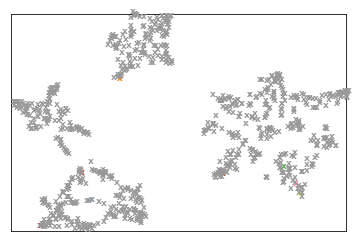

In [426]:
import matplotlib.pyplot as plt
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)   
    y = range(X.shape[0])
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 'x',
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
plot_embedding(tsne_lda)

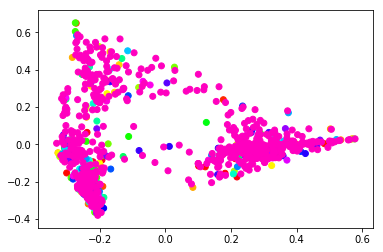

In [422]:
plt.scatter(pca_lda[:,0], pca_lda[:,1], color=cm(range(len(pca_lda))))

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary=lda_model.id2word)
vis